# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

 Business Problem:

The business problem is to identify the key attributes that contribute significantly
to the variance in used car prices. This understanding will provide actionable insights to a used car dealership for fine-tuning their inventory and pricing strategies.

This problem falls under a supervised regression modeling framework.
The objective is to predict the price of a car (the dependent variable) by utilizing all
other available numeric and non-numeric variables as features.
The goal is to develop and compare different regression models, including
Multiple Linear Regression, Lasso, and Ridge, to determine the impact of various attributes on
car price and ultimately identify which model yields the closest forecasted price to the actual price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#importing the data
data = pd.read_csv('/content/vehicles.csv')

In [5]:
#Exploring the info on number of entries, data types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
#Exploring the top rows of the given dataset
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,id,price,year,odometer
count,426880.000,426880.000,425675.000,422480.000
mean,7311486634.224,75199.033,2011.235,98043.331
std,4473170.413,12182282.174,9.452,213881.501
min,7207408119.000,0.000,1900.000,0.000
25%,7308143339.250,5900.000,2008.000,37704.000
50%,7312620821.000,13950.000,2013.000,85548.000
75%,7315253543.500,26485.750,2017.000,133542.500
max,7317101084.000,3736928711.000,2022.000,10000000.000


In [8]:
#Exploring the size of the dataset
data.shape

(426880, 18)

In [9]:
#Count of Null values by column in the given dataset
data.isnull().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


**Initial Data Outlook:**

The dataset contains 426k entries and 18 columns. The price column has a wide range, from 0 to 3.7 billion, with a mean of approximately 75,000. This suggests potential outliers or data entry errors that may need cleaning. and same with year and odometer,
which have a large range. It is important to filter outliers to ensure accurate analysis. These steps will
help clean the data and prepare it for further analysis.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [10]:
#Creating copy of data into data_cleaned
data_cleaned = data.copy()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [11]:
#convert to integer given the nature of the attributes
data_cleaned['odometer'] = data_cleaned['odometer'].astype('Int64')
data_cleaned['year'] = data_cleaned['year'].astype('Int64')

In [12]:
#Filtering the data into best possible estimate
data_cleaned = data_cleaned[(data_cleaned['price'] >= 1000) & (data_cleaned['price'] <= 300000)]
data_cleaned = data_cleaned[(data_cleaned['odometer'] >= 500) & (data_cleaned['odometer'] <= 200000)]
data_cleaned = data_cleaned[(data_cleaned['year'] >= 1960) & (data_cleaned['year'] <= 2023)]


In [13]:
#Utilizing Interquartile Range function to eliminate the outliers
def find_boundaries(series, distance=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * distance)
    upper_bound = Q3 + (IQR * distance)
    return lower_bound, upper_bound

In [14]:
#To address the skewness observed in the first section, price, odometer and year are being log-transformed
data_cleaned['log_price'] = np.log1p(data_cleaned['price'])
data_cleaned['log_odometer'] = np.log1p(data_cleaned['odometer'])
data_cleaned['log_year'] = np.log(data_cleaned['year'])

In [15]:
#In the next three steps, the outliers are being removed
lower_bound_log_price, upper_bound_log_price = find_boundaries(data_cleaned['log_price'])
data_cleaned = data_cleaned[(data_cleaned['log_price'] >= lower_bound_log_price) &
              (data_cleaned['log_price'] <= upper_bound_log_price)]

In [16]:
lower_bound_odometer, upper_bound_odometer = find_boundaries(data_cleaned['odometer'].dropna())
data_cleaned = data_cleaned[(data_cleaned['log_odometer'] >= lower_bound_odometer) &
    (data_cleaned['log_odometer'] <= upper_bound_odometer)]

In [17]:
lower_bound_year, upper_bound_year = find_boundaries(data_cleaned['log_year'].dropna())
data_cleaned = data_cleaned[(data_cleaned['log_year'] >= lower_bound_year) &
               (data_cleaned['log_year'] <= upper_bound_year)]

In [18]:
#dropping the column VIN
data_cleaned = data_cleaned.drop('VIN', axis=1)

In [19]:
#info on the new cleaned dataset
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332152 entries, 27 to 426879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            332152 non-null  int64  
 1   region        332152 non-null  object 
 2   price         332152 non-null  int64  
 3   year          332152 non-null  Int64  
 4   manufacturer  323071 non-null  object 
 5   model         329586 non-null  object 
 6   condition     205343 non-null  object 
 7   cylinders     193578 non-null  object 
 8   fuel          330171 non-null  object 
 9   odometer      332152 non-null  Int64  
 10  title_status  326703 non-null  object 
 11  transmission  330800 non-null  object 
 12  drive         233075 non-null  object 
 13  size          89365 non-null   object 
 14  type          267862 non-null  object 
 15  paint_color   240313 non-null  object 
 16  state         332152 non-null  object 
 17  log_price     332152 non-null  float64
 18  log_odom

In [20]:
#The new shape of the data has 20 rows which include the log columns and 364k rows
data_cleaned.shape

(332152, 20)

The distribution appears roughly bell-shaped, indicating that most cars in the dataset fall within a central range of log-transformed prices.


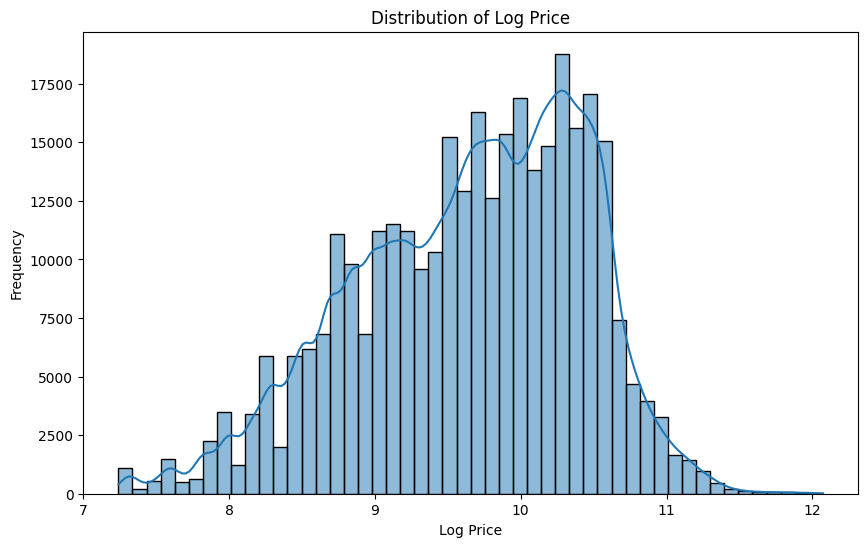

In [21]:
#The distribution appears roughly bell-shaped, indicating that most cars in the dataset
#fall within a central range of log-transformed prices.

#plotting the distribution of log price
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['log_price'].dropna(), kde=True, bins=50)
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
print('The distribution appears roughly bell-shaped, indicating that most cars in the dataset fall within a central range of log-transformed prices.')


The distribution indicates the years from which most cars on the dataset originate.


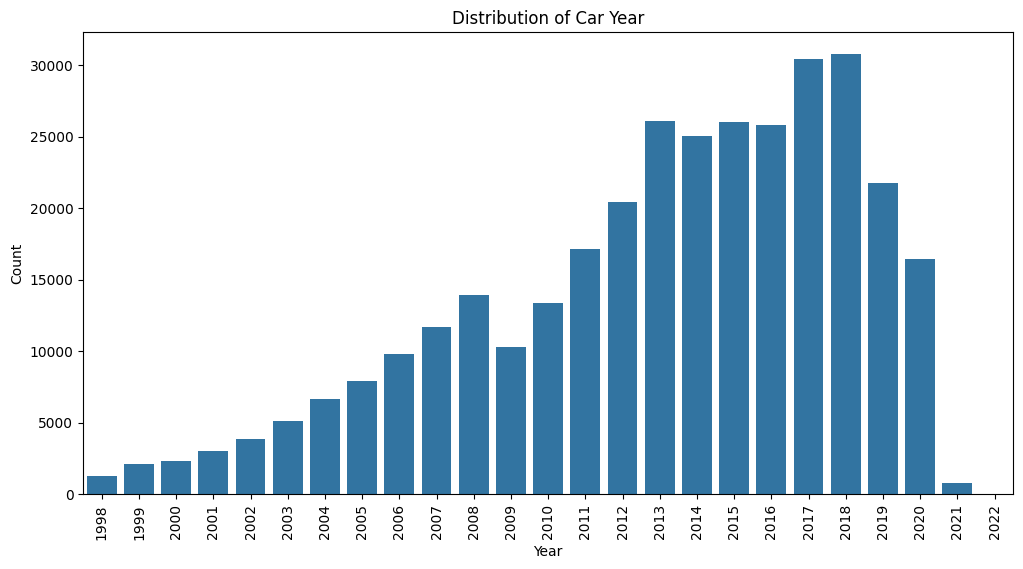

In [22]:
#Here we can see the distribution of car manufacturing years. The distribution indicates
#the years from which most cars on the dataset be;ong to
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='year', order=data_cleaned['year'].value_counts().index.sort_values())
plt.title('Distribution of Car Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
print('The distribution indicates the years from which most cars on the dataset originate.')
plt.show()

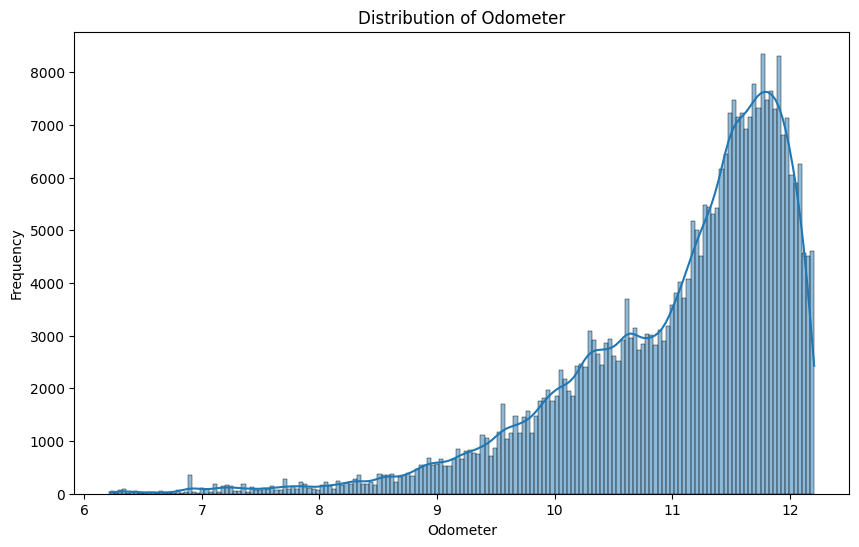

In [23]:
# This distribution provides insight into car mileage, which is an important factor to determine the price
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['log_odometer'].dropna(), kde=True)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

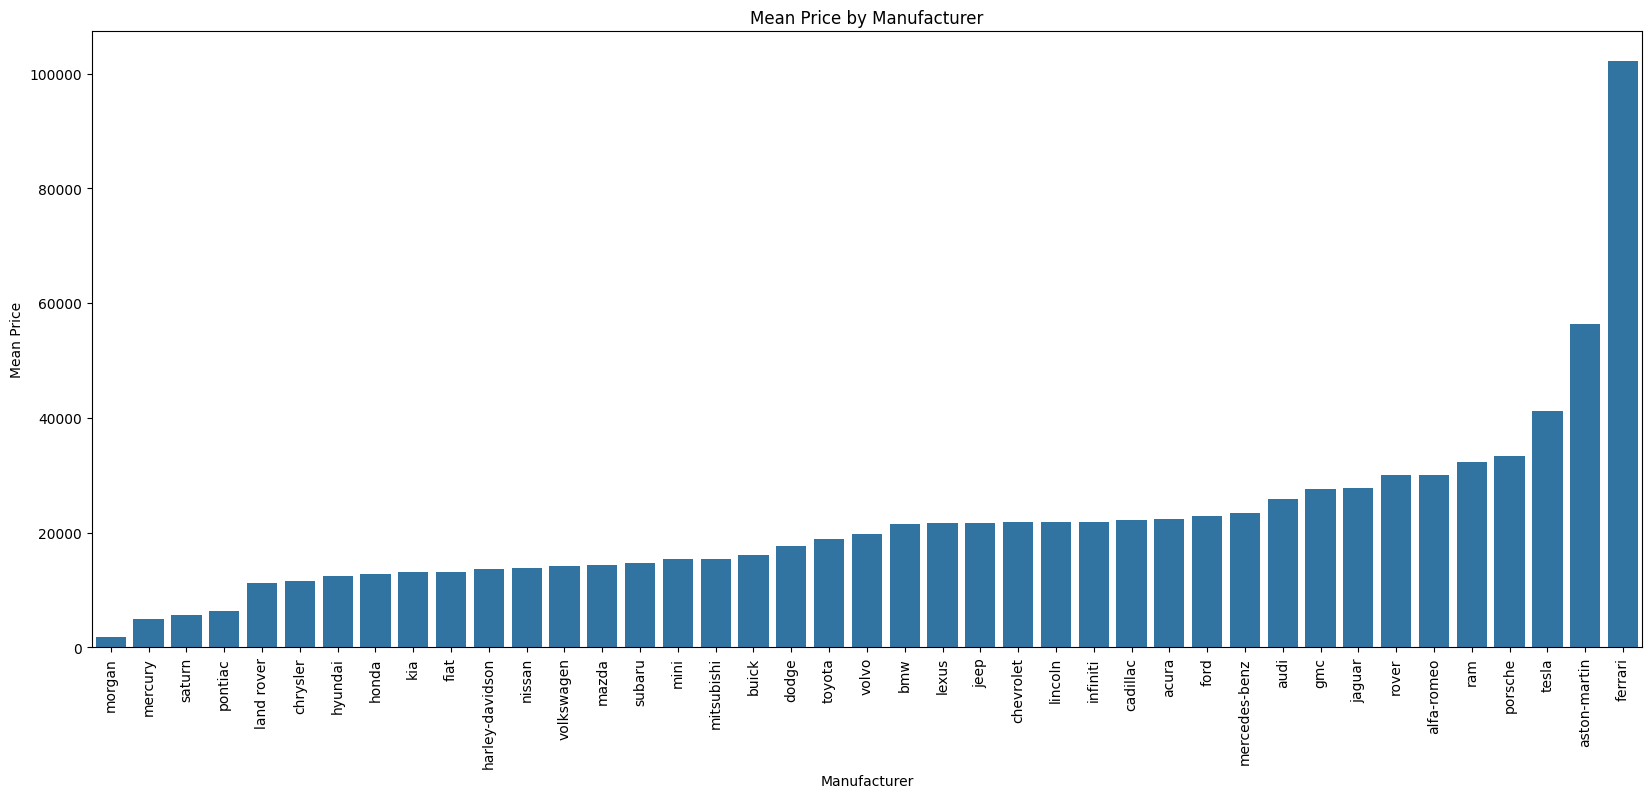

In [24]:
#Determining the mean price by manufacturer
data_grouped = data_cleaned.groupby(['manufacturer'])['price'].mean().reset_index()

plt.figure(figsize=(20, 8))
sns.barplot(x='manufacturer', y='price', data=data_grouped.sort_values(by='price', ascending=True))
plt.title('Mean Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()

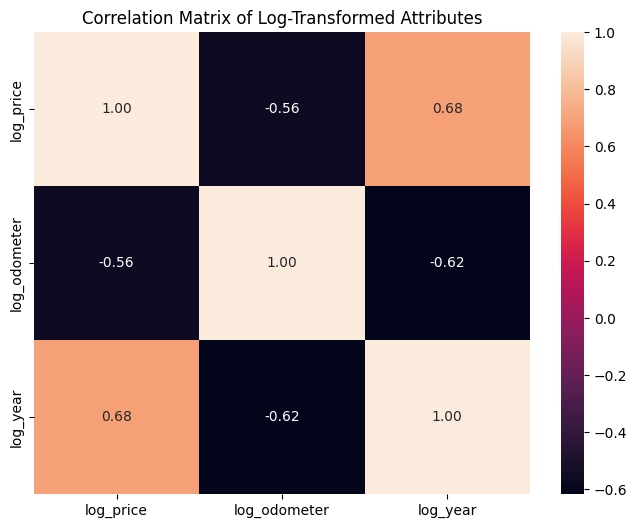

In [25]:
#correlation matrix is used to determine the corelation of different log attributes
#The log_price and log_year have a strong positive correlation, which log price and odometer
#have a negative correlation
cols_for_corr = ['log_price', 'log_odometer', 'log_year']
correlation_matrix = data_cleaned[cols_for_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f")
plt.title('Correlation Matrix of Log-Transformed Attributes')
plt.show()

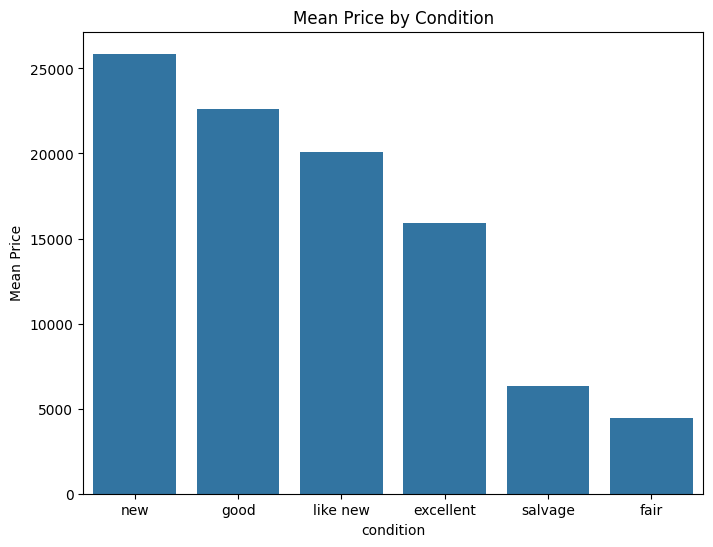

In [26]:
#From the below chart we can understand that the better the condition of the car,
#higher the price of the car
mean_prices = data_cleaned.groupby('condition')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_prices.index, y=mean_prices.values)
plt.title(f'Mean Price by Condition')
plt.ylabel('Mean Price')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Initial Simple Linear Regression Model:

The model was built to predict the log_price using log_odometer and log_year. This is used to determine the relationship between the two attributes

Initial Model coefficients shown below, [-0.46, 1.93] are negative and positive. The negative value for log_odometer indicates a inverse relationship (As car mileage increases, the price decreases). On contrary the positive coefficient indicates a non inverse relationship (Newer the car, higher the price)

The intercept is zero as it was fitted with intercept = False

In [27]:

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
features = data_cleaned[["log_odometer", "log_year"]]
price = data_cleaned["log_price"]

f2 = linear_model.LinearRegression(fit_intercept = False)
f2.fit(features, price)
print(f"Model Coefficients show the positive and negative effect on price")
print(f"Model Coefficients: {f2.coef_}")
print(f"Model Intercept: {f2.intercept_}")

Model Coefficients show the positive and negative effect on price
Model Coefficients: [-0.46131208  1.93861595]
Model Intercept: 0.0


In [28]:
#calculating the residuals with the log dataset. Lower residuals meaning better model accuracy
data_cleaned["prediction"] = f2.predict(data_cleaned[["log_odometer", "log_year"]])
data_cleaned["residuals"] = data_cleaned["log_price"] - data_cleaned["prediction"]
data_cleaned.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,drive,size,type,paint_color,state,log_price,log_odometer,log_year,prediction,residuals
27,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,...,NaN,NaN,pickup,white,al,10.422,10.967,7.608,9.690,0.732
28,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,...,NaN,NaN,pickup,blue,al,10.025,11.174,7.606,9.590,0.435
29,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,...,NaN,NaN,pickup,red,al,10.586,9.861,7.611,10.206,0.381
30,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,...,NaN,NaN,pickup,red,al,10.341,10.624,7.609,9.850,0.491
31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,...,rwd,full-size,truck,black,al,9.616,11.760,7.607,9.323,0.293


### Mean Squared Error(MSE):

Lower the MSE, better the model prediction. In this case, further evaluation of the model is necessary. We are going to further expand with Polynomial Features and Feature selection and evaluate further using Lasso and Ridge Regression

In [29]:
mse = mean_squared_error(data_cleaned["log_price"], f2.predict(data_cleaned[["log_odometer", "log_year"]]))
print(f"Model Mean Squared Error: {mse:.4f}")

Model Mean Squared Error: 0.4200


### Polynomial and Feature Selection:

The data has been split into test and train. Below we see the new shape of Test data and Train data. A degree 3 was chosen to provide a better fit than a simple linear model

In [30]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
#Preparing the data to split into test and train
X = data_cleaned.drop(columns=['id', 'price', 'log_price'])
y = data_cleaned['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (232506, 19)
X_test shape: (99646, 19)


In [32]:
#The model is being trained on training dataset and performance is assessed on testing dataset
poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_train_poly = poly_features.fit_transform(X_train[['log_odometer','log_year']])
X_test_poly = poly_features.transform(X_test[['log_odometer','log_year']])
columns = poly_features.get_feature_names_out(['log_odometer','log_year'])
train_poly = pd.DataFrame(X_train_poly, columns=columns)
test_poly = pd.DataFrame(X_test_poly, columns=columns)

train_poly.head()

,log_odometer,log_year,log_odometer^2,log_odometer log_year,log_year^2,log_odometer^3,log_odometer^2 log_year,log_odometer log_year^2,log_year^3
0,10.846,7.610,117.641,82.539,57.910,1275.970,895.235,628.107,440.687
1,11.701,7.607,136.920,89.016,57.872,1602.131,1041.599,677.178,440.256
2,11.599,7.607,134.529,88.230,57.865,1560.364,1023.350,671.154,440.170
3,9.619,7.611,92.529,73.210,57.925,890.055,704.225,557.193,440.859
4,11.536,7.605,133.076,87.735,57.842,1535.147,1012.096,667.257,439.911


In [33]:
test_poly.head()

,log_odometer,log_year,log_odometer^2,log_odometer log_year,log_year^2,log_odometer^3,log_odometer^2 log_year,log_odometer log_year^2,log_year^3
0,11.949,7.608,142.785,90.908,57.880,1706.171,1086.289,691.621,440.343
1,11.361,7.607,129.078,86.424,57.865,1466.484,981.880,657.415,440.170
2,12.044,7.602,145.047,91.554,57.789,1746.886,1102.636,695.984,439.306
3,10.064,7.610,101.290,76.593,57.918,1019.411,770.852,582.899,440.773
4,11.753,7.605,138.123,89.383,57.842,1623.306,1050.482,679.793,439.911


In [34]:
#From the above polynomial features, we select 3 most impactful features for predicting the log_price
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=3)
best_features = selector.fit_transform(train_poly, y_train)
best_features_poly = pd.DataFrame(best_features, columns=selector.get_feature_names_out())
best_features_poly.head()

,log_odometer^3,log_odometer^2 log_year,log_year^3
0,1275.970,895.235,440.687
1,1602.131,1041.599,440.256
2,1560.364,1023.350,440.170
3,890.055,704.225,440.859
4,1535.147,1012.096,439.911


### MSE:

The model concluded a Train MSE of 0.30 and a Test MSE of 0.30. Lower MSE indicates better mosel performance. Both MSE are close meaning, the model is not significantly overfitting the training data.

In [35]:
pipe = Pipeline([('column_selector', selector), ('linreg', LinearRegression())])
pipe.fit(train_poly, y_train)
train_preds = pipe.predict(train_poly)
test_preds = pipe.predict(test_poly)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
pipe

Train MSE:  0.30
Test MSE:  0.30


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=3)),
                ('linreg', LinearRegression())])

### one-hot encoding:

To apply the non numeric attribute 'condition' to model, one-hot encoding was applied using get_dummies. This conversion helps the regression model to incorporate 'condition' column numerically

In [36]:
#selecting the particular features
import pandas as pd
All_features = ['log_price', 'log_odometer', 'log_year','condition']
data_features = data_cleaned[All_features]
print(data_features.head(5))

    log_price  log_odometer  log_year  condition
27     10.422        10.967     7.608       good
28     10.025        11.174     7.606       good
29     10.586         9.861     7.611       good
30     10.341        10.624     7.609       good
31      9.616        11.760     7.607  excellent


In [37]:
#Converting the 'condition' column unsing get_dummies. Each value will be a column and the corresponsing value
#will be a T/F indication
dummies = pd.get_dummies(data_features[['condition']])
data_w_dummies = pd.concat([data_features, dummies], axis=1)
data_w_dummies = data_w_dummies.drop(columns=['condition'])
print(data_w_dummies.head(5))

    log_price  log_odometer  log_year  condition_excellent  condition_fair  \
27     10.422        10.967     7.608                False           False   
28     10.025        11.174     7.606                False           False   
29     10.586         9.861     7.611                False           False   
30     10.341        10.624     7.609                False           False   
31      9.616        11.760     7.607                 True           False   

    condition_good  condition_like new  condition_new  condition_salvage  
27            True               False          False              False  
28            True               False          False              False  
29            True               False          False              False  
30            True               False          False              False  
31           False               False          False              False  


In [38]:
data_w_dummies.head(5)

,log_price,log_odometer,log_year,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage
27,10.422,10.967,7.608,False,False,True,False,False,False
28,10.025,11.174,7.606,False,False,True,False,False,False
29,10.586,9.861,7.611,False,False,True,False,False,False
30,10.341,10.624,7.609,False,False,True,False,False,False
31,9.616,11.760,7.607,True,False,False,False,False,False


# Lasso Regression:




In [39]:
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [40]:
#Prepare the data by dropping the column to predict and splitting the data into test and train
car_X = data_w_dummies.drop(['log_price'], axis = 1)
car_y = data_w_dummies['log_price']
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_X, car_y,
                                                                       test_size = 0.3,
                                                                       random_state = 42)

### Initial Lasso Regression (car_pipe_o):

The Lasso Regression showed a Lasso trained R2 value of 0.00 as shown in the answer set below. This suggests that the default alpha value assumed in Lasso Regression of 1 was high. The alpha value further needs to be decreased.




In [41]:

car_pipe_o = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])

car_pipe_o.fit(car_X_train, car_y_train)

poly_feature_names_o = car_pipe_o.named_steps['polyfeatures'].get_feature_names_out(car_X_train.columns)
lasso_coefs = car_pipe_o.named_steps['lasso'].coef_

coef_df_o = pd.DataFrame({'feature': poly_feature_names_o, 'coefficient': lasso_coefs})
display(coef_df_o.head(10))

lasso_train_mse_o = mean_squared_error(car_y_train, car_pipe_o.predict(car_X_train))
lasso_test_mse_o = mean_squared_error(car_y_test, car_pipe_o.predict(car_X_test))
lasso_train_r2_o = r2_score(car_y_train, car_pipe_o.predict(car_X_train))
lasso_test_r2_o = r2_score(car_y_test, car_pipe_o.predict(car_X_test))

print(f"Lasso Train mse original: {lasso_train_mse_o:.3f}")
print(f"Lasso Test mse original: {lasso_test_mse_o:.3f}")
print(f"Lasso Train R-squared original: {lasso_train_r2_o:.3f}")
print(f"Lasso Test R-squared original: {lasso_test_r2_o:.3f}")



,feature,coefficient
0,log_odometer,-0.000
1,log_year,0.000
2,condition_excellent,-0.000
3,condition_fair,-0.000
4,condition_good,0.000
5,condition_like new,-0.000
6,condition_new,0.000
7,condition_salvage,-0.000
8,log_odometer^2,-0.000
9,log_odometer log_year,-0.000


Lasso Train mse original: 0.618
Lasso Test mse original: 0.620
Lasso Train R-squared original: 0.000
Lasso Test R-squared original: -0.000


### GridsearchCV:

Below we tuned the Lasso model using GrisSearchCV to find the best alpha value for Lasso Regularization. We utilized a range of alpha values and the best alpha value found was 0.001




In [42]:
pipe_lasso = Pipeline([('scale', StandardScaler()), ('lasso', Lasso())])
param_dict_lasso = {'lasso__alpha': [0.001,0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid_lasso = GridSearchCV(pipe_lasso, param_dict_lasso)
grid_lasso.fit(car_X_train, car_y_train)
train_preds_lasso = grid_lasso.predict(car_X_train)
test_preds_lasso = grid_lasso.predict(car_X_test)
test_mse_lasso = mean_squared_error(car_y_test, test_preds_lasso)
best_alpha = grid_lasso.best_params_




#print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse_lasso: .2f}')
print(f'Best alpha lasso: {list(best_alpha.values())[0]}')

Test MSE:  0.30
Best alpha lasso: 0.001


### Lasso Coefficients:

The coefficients obtained after Lasso tuning and alpha show a significant shift from when the model was not tuned. Below we see the top 10 coefficients for the model.

The performance improved in R-squared from zero to 0.29 on both testing and train dataset. This shows that Lasso Regression can effective in predicting Car price






In [43]:
car_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42,alpha=0.001))])
car_pipe.fit(car_X_train, car_y_train)


poly_feature_names = car_pipe.named_steps['polyfeatures'].get_feature_names_out(car_X_train.columns)
lasso_coefs = car_pipe.named_steps['lasso'].coef_

coef_car_lasso = pd.DataFrame({'feature': poly_feature_names, 'coefficient': lasso_coefs})
coef_car_lasso_filtered = coef_car_lasso[coef_car_lasso['coefficient'] != 0].sort_values(by='coefficient', ascending=False)

display(coef_car_lasso_filtered.head(10))

lasso_train_mse = mean_squared_error(car_y_train, car_pipe.predict(car_X_train))
lasso_test_mse = mean_squared_error(car_y_test, car_pipe.predict(car_X_test))
lasso_train_r2 = r2_score(car_y_train, car_pipe.predict(car_X_train))
lasso_test_r2 = r2_score(car_y_test, car_pipe.predict(car_X_test))

print(f"Lasso Train mse: {lasso_train_mse:.3f}")
print(f"Lasso Test mse: {lasso_test_mse:.3f}")
print(f"Lasso Train R-squared: {lasso_train_r2:.3f}")
print(f"Lasso Test R-squared: {lasso_test_r2:.3f}")





,feature,coefficient
52,log_odometer log_year^2,0.592
1,log_year,0.208
16,log_year^2,0.147
80,log_year^3,0.002
86,log_year^2 condition_salvage,-0.000
18,log_year condition_fair,-0.000
82,log_year^2 condition_fair,-0.000
81,log_year^2 condition_excellent,-0.001
22,log_year condition_salvage,-0.001
50,log_odometer^2 condition_new,-0.005


Lasso Train mse: 0.289
Lasso Test mse: 0.290
Lasso Train R-squared: 0.533
Lasso Test R-squared: 0.533


# Ridge Regression:

We started with optimizing alpha value for Ridge and performing GridSearchCV



In [44]:

pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(pipe, param_dict)
grid.fit(car_X_train, car_y_train)
train_preds = grid.predict(car_X_train)
test_preds = grid.predict(car_X_test)
train_mse = mean_squared_error(car_y_train, train_preds)
test_mse = mean_squared_error(car_y_test, test_preds)
best_alpha = grid.best_params_




print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
print(f'Best alpha: {list(best_alpha.values())[0]}')

Train MSE:  0.30
Test MSE:  0.30
Best alpha: 10.0


In [45]:
#create a ridge pipeline and identify the top 10 coefficients
ridge_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('ridge', Ridge(random_state = 42,alpha=10))])
ridge_pipe.fit(car_X_train, car_y_train)
ridge_coefs = ridge_pipe.named_steps['ridge'].coef_

poly_feature_names_r_o = ridge_pipe.named_steps['polyfeatures'].get_feature_names_out(car_X_train.columns)
ridge_coef = pd.DataFrame({'feature': poly_feature_names_r_o, 'coefficient': ridge_coefs})
ridge_coef_filtered = ridge_coef[ridge_coef['coefficient'] != 0].sort_values(by='coefficient', ascending=False)


display(ridge_coef_filtered.head(10))

,feature,coefficient
45,log_odometer^2 log_year,1.207
8,log_odometer^2,0.955
55,log_odometer log_year condition_good,0.583
46,log_odometer^2 condition_excellent,0.563
70,log_odometer condition_good^2,0.531
12,log_odometer condition_good,0.531
47,log_odometer^2 condition_fair,0.296
80,log_year^3,0.237
108,condition_excellent^3,0.157
23,condition_excellent^2,0.157


# Ridge Coefficients and Rsquared:

Above we can see the top 10 Ridge coefficients and below we can see the Rsquared value which is around 0.28





In [46]:
ridge_train_mse = mean_squared_error(car_y_train, ridge_pipe.predict(car_X_train))
ridge_test_mse = mean_squared_error(car_y_test, ridge_pipe.predict(car_X_test))
ridge_train_r2 = r2_score(car_y_train, ridge_pipe.predict(car_X_train))
ridge_test_r2 = r2_score(car_y_test, ridge_pipe.predict(car_X_test))
print(f"Ridge Train mse: {ridge_train_mse:.3f}")
print(f"Ridge Test mse: {ridge_test_mse:.3f}")
print(f"Ridge Train R-squared: {ridge_train_r2:.3f}")
print(f"Ridge Test R-squared: {ridge_test_r2:.3f}")

Ridge Train mse: 0.288
Ridge Test mse: 0.288
Ridge Train R-squared: 0.535
Ridge Test R-squared: 0.535


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Evaluating Lasso and Ridge Models: Performance and Bias Analysis

Upon evaluating the Lasso and Ridge regression models, I observed that both exhibited very similar Mean Squared Error (MSE) and R-squared (R2) values. Despite the close performance, I've decided to proceed with the Ridge model. Ridge regression was marginally preferred due to its slightly lower MSE and R-squared values on both the log-transformed and original price scales.

Further analysis of the Ridge model's residuals, particularly when examining the residual percentage against predicted prices, reveals a notable bias: The model demonstrates better predictive accuracy for lower-priced cars. However, as car prices increase, the model's predictive accuracy diminishes. This is visible in the scatter plot of actual vs. predicted values where the spread of residuals widens for higher predicted prices.

In short, while the model performs reasonably well for less expensive vehicles, it does not predict higher-valued cars with the same level of precision, leading to larger and more variable errors.

In [47]:
#Comparing the models
Final_data = {
    'Model': ['Lasso', 'Ridge'],
    'MSE': [lasso_train_mse, ridge_train_mse],
    'R-squared': [lasso_train_r2, ridge_train_r2]
}
metrics = pd.DataFrame(Final_data)

print("Model Performance:")
display(metrics)

Model Performance:


,Model,MSE,R-squared
0,Lasso,0.289,0.533
1,Ridge,0.288,0.535


In [48]:
#Calculating the residuals
ridge_predicted_prices = ridge_pipe.predict(car_X_test)
actual_prices_original_scale = np.expm1(car_y_test)
predicted_prices_original_scale = np.expm1(ridge_predicted_prices)

data_cleaned = data_cleaned.assign(
    actual_price=actual_prices_original_scale,
    ridge_predicted_price=pd.Series(predicted_prices_original_scale, index=car_X_test.index)
)
test_results = data_cleaned.dropna(subset=['actual_price', 'ridge_predicted_price']).copy()
test_results['ridge_residuals'] = test_results['actual_price'] - test_results['ridge_predicted_price']
test_results['ridge_residuals%'] = test_results['ridge_residuals'] / test_results['actual_price'] * 100

print(test_results[['actual_price', 'ridge_predicted_price', 'ridge_residuals','ridge_residuals%']].head(10))



    actual_price  ridge_predicted_price  ridge_residuals  ridge_residuals%
27     33590.000              18291.567        15298.433            45.545
29     39590.000              36655.145         2934.855             7.413
33     34590.000              25682.148         8907.852            25.753
34     35000.000              27402.783         7597.217            21.706
39     24590.000              25389.934         -799.934            -3.253
40     30990.000              24677.169         6312.831            20.371
44     30990.000              28768.095         2221.905             7.170
45     27990.000              27926.930           63.070             0.225
51     22590.000              25621.794        -3031.794           -13.421
53     27990.000              38187.367       -10197.367           -36.432


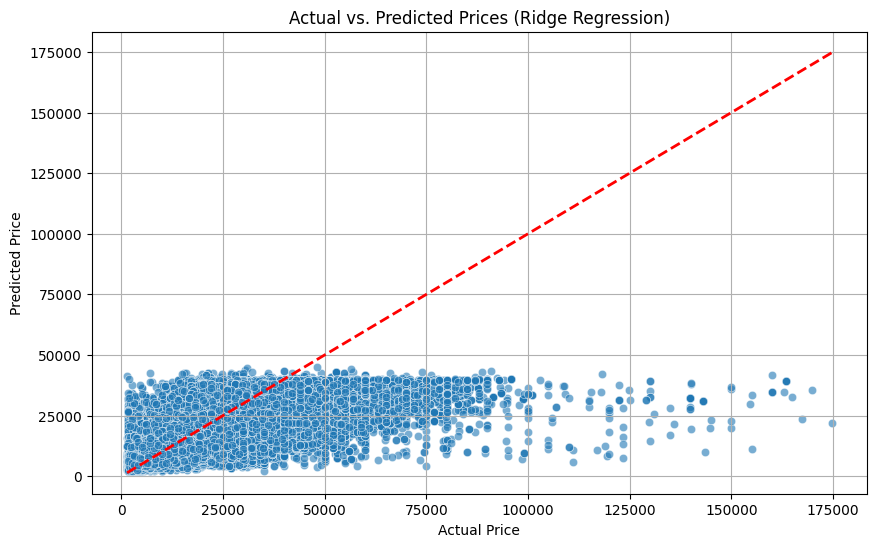

In [49]:
#Actual vs Predicted Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='ridge_predicted_price', data=test_results, alpha=0.6)
plt.plot([test_results['actual_price'].min(), test_results['actual_price'].max()],
         [test_results['actual_price'].min(), test_results['actual_price'].max()],
         color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Prices (Ridge Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## Summary of Key Data Attributes
### The Key Attributes of Used Car Prices

Our analysis reveals that three primary attributes are the most significant factors influencing the price of a used car:

1.  **Year**: This is the manufacturing year of a car. Newer vehicles generally have higher prices. This is because they are updated and typically have less overall wear and tear compared to older models.

2.  **Odometer Reading**: The mileage on a car's odometer has a strong inverse relationship with its price. Cars with lower odometer readings tend to sell for higher prices.

3.  **Condition**: The physical and mechanical condition of a car plays a vital role in its pricing. Cars classified as 'excellent' or 'like new' get premium prices. In contrast, vehicles in 'fair' or 'salvage' condition are priced significantly lower due to the anticipated need for repairs or their limited usability.


### Why These Attributes Were Selected for Our Model

These three attributes were selected as key features for our predictive model based on their strong statistical correlations observed during our data exploration phase:

*   **Year and Price**: We found a strong positive correlation between the car's year and its log-transformed price (correlation coefficient of approximately 0.68). This indicates that as the manufacturing year increases (i.e., the car is newer), its price tends to rise.
*   **Odometer and Price**: There was a clear negative correlation between the car's log-transformed odometer reading and its log-transformed price (correlation coefficient of approximately -0.56). This confirms that higher mileage is associated with lower prices.
*   **Condition and Price**: Cars in better conditions consistently showed higher mean prices, making 'condition' a powerful categorical predictor.

Please see below chart for Car price and condition

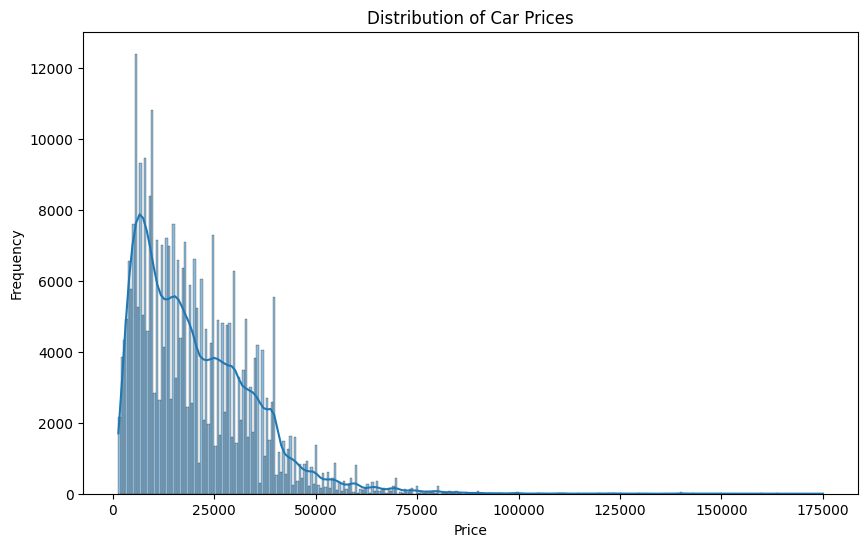

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'].dropna(), kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


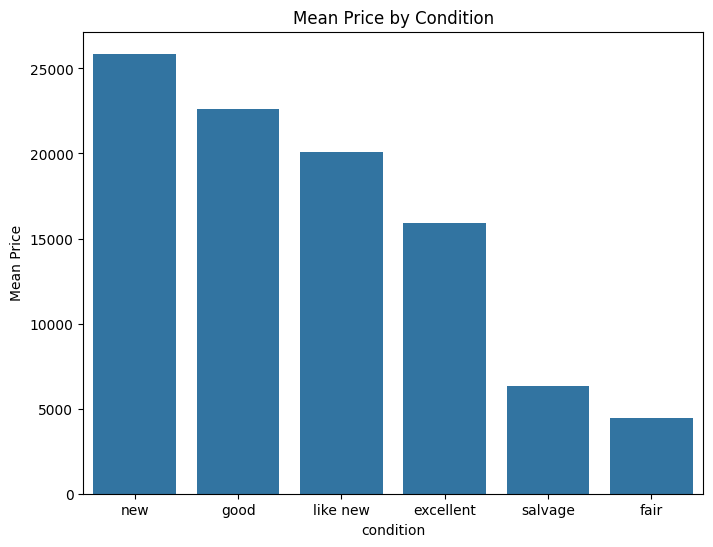

In [51]:
#From the below chart we can understand that the better the condition of the car,
#higher the price of the car
mean_prices = data_cleaned.groupby('condition')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_prices.index, y=mean_prices.values)
plt.title(f'Mean Price by Condition')
plt.ylabel('Mean Price')
plt.show()

## Model Performance and Identified Bias

### Model Comparison
We evaluated two regression models: Lasso and Ridge, to predict used car prices. Both models showed very similar performance in price (R-squared) and their prediction error (Mean Squared Error or MSE). As seen in the Model Performance table below, their MSE and R-squared values were almost identical.

| Model | MSE  | R-squared |
|:------|:---- |:----------|
| Lasso | 0.289| 0.53      |
| Ridge | 0.288| 0.53      |

### Why Ridge Regression was Chosen
While the performance was very close, we slightly favored the Ridge regression model as the MSE was slightly better and it is more preferred over Lasso

### Understanding Model Bias: Predicting Car Prices
One very important thing to note here is that the model is performing better for cars with lower prices over the higher prices. If you take a look at the distribution, the lower priced cars are concentrated much better around actuals than a higher priced car.

This bias means that while we can confidently estimate prices for more affordable vehicles, the predictions for expensive cars tend to have a larger margin of error.

Furthermore, examining the ridge_residuals% column from our test results (the percentage difference between actual and predicted prices) also illustrates this. For higher-priced vehicles, the percentage errors can be larger or inconsistent.



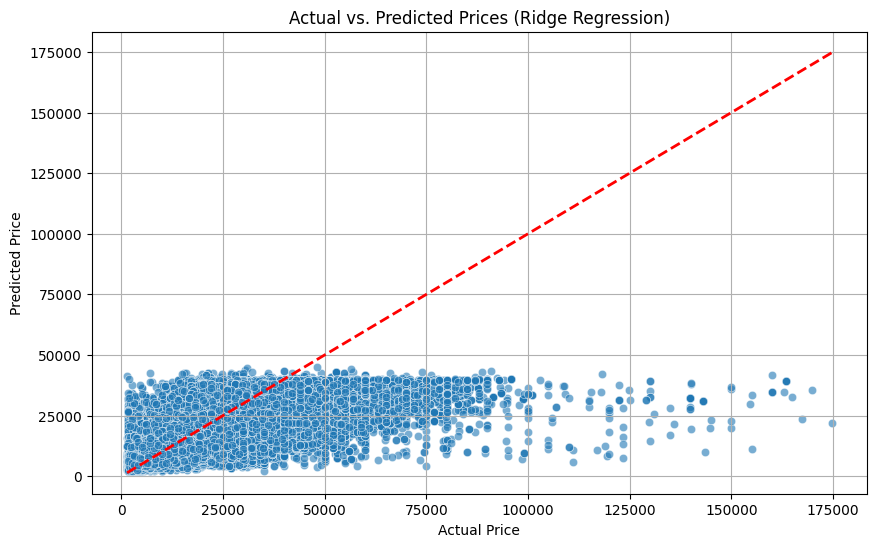

In [52]:
#Actual vs Predicted Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='ridge_predicted_price', data=test_results, alpha=0.6)
plt.plot([test_results['actual_price'].min(), test_results['actual_price'].max()],
         [test_results['actual_price'].min(), test_results['actual_price'].max()],
         color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Prices (Ridge Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

## Summary:

*   **Key Drivers of Car Prices**: Three primary attributes significantly influence used car prices:
    *   **Year**: Newer vehicles command higher prices due to modern features, efficiency, and less wear. A strong positive correlation (approximately 0.68) was observed between the car's year and its price.
    *   **Odometer Reading**: Lower mileage is associated with higher prices. A clear negative correlation (approximately -0.56) was found between odometer reading and price.
    *   **Condition**: Cars in better physical and mechanical condition (e.g., 'excellent' or 'like new') fetch significantly higher prices compared to those in 'fair' or 'salvage' condition.
*   **Model Performance**: Both Lasso and Ridge regression models achieved similar performance metrics, with an R-squared of 0.53 and a Mean Squared Error (MSE) of 0.29.
*   **Model Selection**: Ridge regression was slightly preferred over Lasso.
*   **Bias**: The developed model shows bias: it predicts the prices of lower-valued cars more accurately than higher-valued cars.
*   **Price Distribution by Condition**: Visual analysis confirms that cars in 'excellent' and 'like new' conditions have considerably higher average prices and different price distributions compared to cars in 'fair' or 'salvage' conditions.

### Insights or Next Steps

*   **Pricing Strategy**: Utilize the model's high accuracy for lower to mid-range used cars. For high-end or luxury vehicles,in lieu of model's predictions perform additional market research due to its observed bias.
*   **Car Condition**: Prefer acquiring and maintaining cars in 'excellent' or 'like new' condition, as these attributes correlate with higher selling prices and might obtain better profit margins.
